## Write a Data Science Blog Post
### War for talent! What companies need to do to  attract talent within software engineering. 

With the help of the Stack Overflow Developer Survey from 2019 I want to answer the question, what companies need to do to attract talent within software engineering.
For the analysis of the data set I will follwo the CRISP-DM Process (Cross Industry Process for Data Mining)

### 1. Business Understanding

During my time in an e-commerce Startup in Berlin, I quickly realized that biggest challenge for tech-driven Start-up is to find talented software engineers.
In December of 2018 there was a shortage of 82.000 of IT specialists and according the german newspaper Handelsblatt, it takes in average 143 days to fill an open position.
What must a company do to attract talent in this ongoing war for talent with this high demand for engineers? 
How does developer think? What's important to them? Recruiter, HR and other decisions maker must understand how to create an work environment which is attractive to software engineers. 
With the help of the Stack Overflow Developer Survey from 2019 I want to answer the question, what companies need to do to attract talent within software engineering.




### 2. Data Understanding

In [9]:
# importing the neccessary libaries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

### Loading the data -  2019 Stack Overflow Developer Survey.

The data set is the full, cleaned results of the **2019 Stack Overflow Developer Survey**. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. There are two CSV files:

1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name

In [10]:
# loading the dataset and the survey schema to the notebook
survey_schmema = pd.read_csv('survey_results_schema.csv')
survey_df = pd.read_csv('survey_results_public.csv')
survey_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [11]:
survey_schmema[survey_schmema['Column']=='CodeRevHrs']

,Column,QuestionText
39,CodeRevHrs,"On average, how many hours per week do you spe..."


In [12]:
#gettinga first overview about the data
survey_df.shape

(88883, 85)

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

Now take a look at the summary statistics associated with the quantitative variables in your dataset. 

In [14]:
survey_df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


We can also see from the summary statistics that we have missing values

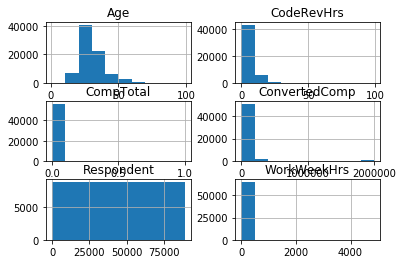

In [15]:
survey_df.hist();

One can see that the age, hours spend on code revies (CodeRevHrs) and the Salary (CompTotal, ConvertedCommp) are right-skweded

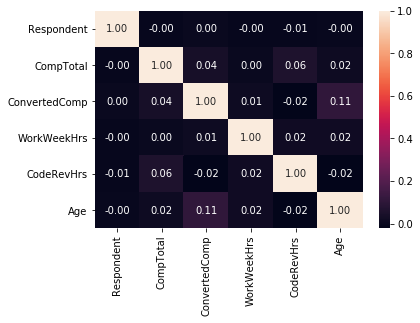

In [16]:
# creating a heatmap to see correlations between the quantitative variables
sns.heatmap(survey_df.corr(), annot=True, fmt=".2f");

We can see the highest positive correlation between the compensations (Salary) and the Age, while the hours worked per week just seem to have weak correlation with the Salary

#### What are the factors that influence Job and career satisfaction (CareerSat & JobSat)?

In [17]:
#lets have a look at the two variables CareerSat & JobSat
job_sat = survey_df.JobSat.value_counts(dropna=False)
carrer_sat = survey_df.CareerSat.value_counts(dropna=False)
(job_sat/survey_df.shape[0]*100)

Slightly satisfied                    27.234679
Very satisfied                        25.260173
NaN                                   20.133209
Slightly dissatisfied                 12.096801
Neither satisfied nor dissatisfied     9.810650
Very dissatisfied                      5.464487
Name: JobSat, dtype: float64

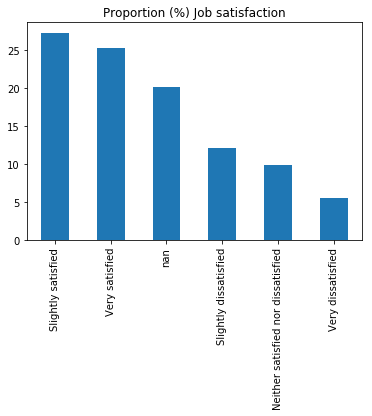

In [18]:
#bar chart of the proportion of individuals in each category (from very satisfied to very dissatisfied) 
(job_sat/survey_df.shape[0]*100).plot(kind='bar')
plt.title('Proportion (%) Job satisfaction');

In [19]:
(carrer_sat/survey_df.shape[0]*100)

Very satisfied                        32.821799
Slightly satisfied                    28.147115
NaN                                   18.041695
Slightly dissatisfied                  8.629322
Neither satisfied nor dissatisfied     8.159041
Very dissatisfied                      4.201028
Name: CareerSat, dtype: float64

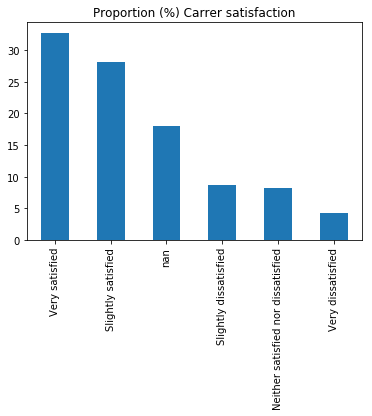

In [20]:
#bar chart of the proportion of individuals in each category (from very satisfied to very dissatisfied) 
(carrer_sat/survey_df.shape[0]*100).plot(kind='bar')
plt.title('Proportion (%) Carrer satisfaction');

The result show that the majority is satisified (very satisfied and sligthly satisfied) with their carrer (about 60%) but just the half (around 52%) of the participants is satisfied (very satisfied and sligthly satisfied) with their current job situation. 
26% of the participant are dissatisfied with the current job, while 20% of the participants are dissatisified with their job.
Interesting is also that around 20% didnt answer the question if their satisfied or dissatisfied with their job. 
In the next step I would like to identify the main drivers for job satisfication resp. job dissatisfaction.

In [21]:
#first I replace the strings with numerical values: from 1-5 (very dissatisfied- very satisfied) and save them in new column
survey_df['JobSat_num'] = survey_df.JobSat.replace(['Very dissatisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied', 'Slightly satisfied','Very satisfied'], [1, 2, 3, 4, 5])
survey_df['CarrerSat_num'] = survey_df.CareerSat.replace(['Very dissatisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied', 'Slightly satisfied','Very satisfied'], [1, 2, 3, 4, 5])

In [22]:
#sanity check 
survey_df['JobSat_num'].head()

0    NaN
1    NaN
2    4.0
3    4.0
4    3.0
Name: JobSat_num, dtype: float64

In [23]:
#sanity check 
survey_df['CarrerSat_num'].head()

0    NaN
1    NaN
2    4.0
3    5.0
4    1.0
Name: CarrerSat_num, dtype: float64

By looking at the survey I identified the following questions can be answered through the following variables:

- What framework/ work environmet must a company offer to attract developer resp. which organisational environment makes them satisfied in terms of career and their job (Proxies: OrgSize, work remote, type of employment, compensation) ?
- Does interest in the field make you a more happy developer (Proxies: Hobbies, Open Sourcer, Are people who code in their freetime are more happy?)
- What managerial style (PurchaseWhat, manager compensation, work plan, confidence in Manager) 
- what distractis them the most from work and which distraction makes the most dissatsiefied?

### Which work environmet must a company offer to attract developer resp. which organisational environment makes them satisfied in terms of career and their job?

In [24]:
survey_df.groupby(['Employment']).mean()['JobSat_num'].sort_values(ascending=False).dropna()

Employment
Employed full-time                                      3.720614
Independent contractor, freelancer, or self-employed    3.695061
Employed part-time                                      3.670794
Name: JobSat_num, dtype: float64

In [25]:
survey_df.groupby(['Employment']).mean()['CarrerSat_num'].sort_values(ascending=False).dropna()

Employment
Employed full-time                                      3.977713
Independent contractor, freelancer, or self-employed    3.866879
Employed part-time                                      3.825489
Not employed, but looking for work                      3.153952
Name: CarrerSat_num, dtype: float64

The most satisfied with their job and carrer are delevopers that are employed full time

In [26]:
survey_df.groupby(['OrgSize']).mean()['JobSat_num'].sort_values(ascending=False)

OrgSize
2-9 employees                                         3.742612
1,000 to 4,999 employees                              3.740485
500 to 999 employees                                  3.740159
100 to 499 employees                                  3.739463
20 to 99 employees                                    3.727894
5,000 to 9,999 employees                              3.713739
10 to 19 employees                                    3.703551
10,000 or more employees                              3.683896
Just me - I am a freelancer, sole proprietor, etc.    3.621438
Name: JobSat_num, dtype: float64

The job satisfaction seems in general not related with the organizatuon site. But its obvious that freelancer and developer in big companies are the most dissatisfied. 

In [27]:
survey_df.groupby(['OrgSize']).mean()['CarrerSat_num'].sort_values(ascending=False)

OrgSize
5,000 to 9,999 employees                              4.025677
10,000 or more employees                              4.024438
1,000 to 4,999 employees                              4.018177
100 to 499 employees                                  3.994937
500 to 999 employees                                  3.982050
20 to 99 employees                                    3.963428
10 to 19 employees                                    3.918274
2-9 employees                                         3.890463
Just me - I am a freelancer, sole proprietor, etc.    3.796109
Name: CarrerSat_num, dtype: float64

The carrer satisfaction is higher in bigger companies and declines with the size of the company. 
This is mostly likely due to the fact that bigger companies offers more carrer possibilites and have a more carrer steps

In [28]:
survey_df.groupby(['WorkRemote']).mean()['JobSat_num'].sort_values(ascending=False)

WorkRemote
All or almost all the time (I'm full-time remote)          3.838488
A few days each month                                      3.826089
Less than half the time, but at least one day each week    3.814997
More than half, but not all, the time                      3.684966
About half the time                                        3.672892
Less than once per month / Never                           3.639708
It's complicated                                           3.416507
Name: JobSat_num, dtype: float64

The data shows that developer who works remot full-time are the most satisfied. From the ones that are work remotely full time, the ones that just works a few days remote are most satisfied.
The ones that dont work remote are most dissatisfied

In [29]:
survey_df.groupby(['WorkRemote']).mean()['CarrerSat_num'].sort_values(ascending=False)

WorkRemote
Less than half the time, but at least one day each week    4.087975
A few days each month                                      4.075165
All or almost all the time (I'm full-time remote)          4.009214
About half the time                                        3.930010
More than half, but not all, the time                      3.919613
Less than once per month / Never                           3.897915
It's complicated                                           3.692245
Name: CarrerSat_num, dtype: float64

On the other hand, the data for the carrer satisfaction is not so clear. 
But rhe ones that dont work remote are most dissatisfied with their carrer

In [30]:
survey_df.groupby('JobSat_num').mean()['ConvertedComp']

JobSat_num
1.0    120739.585703
2.0    106379.734029
3.0    110360.994075
4.0    123414.081801
5.0    147949.915596
Name: ConvertedComp, dtype: float64

In [31]:
survey_df.groupby('CarrerSat_num').mean()['ConvertedComp']

CarrerSat_num
1.0    105021.996615
2.0     95161.797647
3.0    100894.706079
4.0    119516.699579
5.0    148942.885712
Name: ConvertedComp, dtype: float64

You can see that the satisfaction in average rises with the compensation (carrer and job satisfaction).
But the most interesting inside is that the compensation doesnt prevent employees from beign dissatisied. The ones that are most dissatisfied ('1') have a decent salary in average makes you more satisfied.

Call for action for HR:
- offer full-time employements
- offer carrer possibilities and more carer steps
- keep the spirit of small companies, flat hierachies

### Does interest in the field of software engineering make you a more satisfied developer (Proxies: Hobbies, Open Sourcer) Are people who code in their freetime are more happy?

In [32]:
survey_df.groupby(['Hobbyist']).mean()['JobSat_num'].sort_values(ascending=False)

Hobbyist
Yes    3.729318
No     3.656007
Name: JobSat_num, dtype: float64

In [33]:
survey_df.groupby(['Hobbyist']).mean()['CarrerSat_num'].sort_values(ascending=False)

Hobbyist
Yes    3.973571
No     3.824660
Name: CarrerSat_num, dtype: float64

In [34]:
survey_df.groupby(['OpenSourcer']).mean()['JobSat_num'].sort_values(ascending=False)

OpenSourcer
Once a month or more often                            3.836499
Less than once a month but more than once per year    3.770145
Less than once per year                               3.697076
Never                                                 3.646317
Name: JobSat_num, dtype: float64

In [35]:
survey_df.groupby(['OpenSourcer']).mean()['CarrerSat_num'].sort_values(ascending=False)

OpenSourcer
Once a month or more often                            4.053388
Less than once a month but more than once per year    4.011644
Less than once per year                               3.923462
Never                                                 3.870975
Name: CarrerSat_num, dtype: float64

Developer who code as a hobby and who contribute to open source projects more frequently are the more satisfied with their carrer and their current job situation 

Call for action HR:
- offer the possibility to work on passion projects and contribute to open source project for some hours under the working time

### What managerial style is prefered by developers ?

In [36]:
survey_df.groupby(['MgrIdiot']).mean()['JobSat_num'].sort_values(ascending=False)

MgrIdiot
Very confident            4.140043
I don't have a manager    3.796834
Somewhat confident        3.591747
Not at all confident      2.883239
Name: JobSat_num, dtype: float64

In [37]:
survey_df.groupby(['MgrIdiot']).mean()['CarrerSat_num'].sort_values(ascending=False)

MgrIdiot
Very confident            4.214009
I don't have a manager    4.038906
Somewhat confident        3.861960
Not at all confident      3.543466
Name: CarrerSat_num, dtype: float64

The shows that having confidence in Management is key for the satisfaction. In fact, its better to have no Manager than having a Manager that people dont have confidence in.

In [38]:
survey_df.groupby(['WorkPlan']).mean()['JobSat_num'].sort_values(ascending=False)

WorkPlan
There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns     3.795555
There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely    3.777556
There's no schedule or spec; I work on what seems most important or urgent                      3.553907
Name: JobSat_num, dtype: float64

In [39]:
survey_df.groupby(['WorkPlan']).mean()['CarrerSat_num'].sort_values(ascending=False)

WorkPlan
There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns     4.029847
There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely    3.984135
There's no schedule or spec; I work on what seems most important or urgent                      3.844681
Name: CarrerSat_num, dtype: float64

On the other hand, developer appreciate if there is a shedule, work plan that they can follow. 
The ones that dont a shedule or spec are the ones that are the most dissatisfied

In [40]:
survey_df.groupby(['PurchaseWhat']).mean()['JobSat_num'].sort_values(ascending=False)

PurchaseWhat
I have a great deal of influence    3.942062
I have some influence               3.837017
I have little or no influence       3.518737
Name: JobSat_num, dtype: float64

In [41]:
survey_df.groupby(['PurchaseWhat']).mean()['CarrerSat_num'].sort_values(ascending=False)

PurchaseWhat
I have a great deal of influence    4.152483
I have some influence               4.050584
I have little or no influence       3.837532
Name: CarrerSat_num, dtype: float64

the more influence developer in purchasing descision, the more satisfied they are with their work

Call for action HR:

- install management team around IT that understands what they are doing.
- its better to not having a manager than one that doesnt fit the team
- Management has to estbalish a process flow where people than follow the shedule, but there needs to be space to variance
- encourage managerial style, where employees have influence in decisions

### What distracts developer the most from work and which factors are important when choosing a new job?

In [42]:
# the variable work challenge (what are your greatest challenges to productivity as a developer) needs to be engineered in order ot draw conclusion from it
# first I need identify the possible values
possible_values_work_challenge = ['Distracting work environment', 'Being tasked with non-development work',
                   'Meetings','Time spent commuting', 'Not enough people for the workload','Toxic work environment',
                   'Inadequate access to necessary tools','Lack of support from management',
                   'Non-work commitments (parenting, school work, hobbies, etc.)']

In [43]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [44]:
def clean(df):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
      
    '''
    work_challenge =survey_df['WorkChallenge'].value_counts().reset_index()
    work_challenge.rename(columns={'index': 'challenge', 'WorkChallenge': 'count'}, inplace=True)
    work_challenge_df = total_count(work_challenge, 'challenge', 'count', possible_values_work_challenge)
    work_challenge_df.set_index('challenge', inplace=True)
    
    return work_challenge_df

work_challenge_df = clean(survey_df)

In [45]:
# top 3 challeges named in the question
work_challenge_df[:3]

,count
challenge,
Distracting work environment,28491
Meetings,24961
Being tasked with non-development work,24846


In [46]:
# the variable work challenge needs to be engineered in order ot draw conclusion from it
# first I need identify the possible values
possible_values_job_factors = ['Diversity of the company or organization', 'Diversity of the company or organization',
                   'Industry that I’d be working in','How widely used or impactful my work output would be',
                   'Specific department or team I’d be working on','Flex time or a flexible schedule',
                   'Remote work options','Financial performance or funding status of the company or organization',
                   'Office environment or company culture', 'Opportunities for professional development']

In [47]:
def clean(df):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
      
    '''
    job_factors =survey_df['JobFactors'].value_counts().reset_index()
    job_factors.rename(columns={'index': 'factor', 'JobFactors': 'count'}, inplace=True)
    job_factors_df = total_count(job_factors, 'factor', 'count', possible_values_job_factors)
    job_factors_df.set_index('factor', inplace=True)
    
    return job_factors_df

job_factors_df = clean(survey_df)

In [48]:
# top 3 factors for choosig a job named in the question
job_factors_df[:3]

,count
factor,
Office environment or company culture,38478
Flex time or a flexible schedule,36200
Opportunities for professional development,34533


Call for action HR: 
- create a good office environment
- minimize meetings and non-development tasks- creating of support functions, so the developer can focus on their main tasks

### 3. Prepare Data

I want to use a multiple linear regression to see which factors have influence on the job resp. the carrer satisfaction - for this I need to first handle missing values (I dont wanna just drop them) and the categorical variables (create dummies)

In [49]:
survey_schmema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


I will include the following independent variables (x) in my regression:
- Hobbyist
- OpenSourcer
- Employment
- WorkRemote
- ConvertedComp
- OrgSize
- MgrIdiot
- WorkPlan
- PurchaseWhat

In [50]:
# creating a new df that just includes the variables that I want to have in the regression
survey_reg = survey_df[["Respondent","Hobbyist", "OpenSourcer", "Employment", "WorkRemote", "ConvertedComp", "OrgSize", "MgrIdiot", "WorkPlan", "PurchaseWhat", "CarrerSat_num", "JobSat_num"]]
# sanity check
print(survey_reg.shape)

(88883, 12)


In [51]:
#set of columns that doesnt have missing values
no_missing_values = set(survey_reg.columns[survey_reg.isnull().mean()==0])
print('Just the following columns have no missing values: {}'.format(no_missing_values))

Just the following columns have no missing values: {'OpenSourcer', 'Respondent', 'Hobbyist'}


In [52]:
# lets have look at which coloums have the highest amount of missing data
survey_reg.isnull().mean().sort_values(ascending=False)

ConvertedComp    0.371950
MgrIdiot         0.311916
PurchaseWhat     0.302128
WorkPlan         0.224666
WorkRemote       0.209253
JobSat_num       0.201332
OrgSize          0.192298
CarrerSat_num    0.180417
Employment       0.019149
OpenSourcer      0.000000
Hobbyist         0.000000
Respondent       0.000000
dtype: float64

In [53]:
# total amount of missing values in %
survey_reg.isnull().mean().mean()*100
print('Total amount of missing values in %: {}'.format((survey_reg.isnull().mean().mean()*100).round(2)))

Total amount of missing values in %: 16.78


In [54]:
# lets have a look at the columns that have more than 20% missing values
over_20 = (survey_reg.columns[survey_reg.isnull().mean() > .2]).value_counts().sum()
print('{} % of the columns ({} columns) have more than 20% missing values'.format(((over_20/survey_df.shape[1]* 100)).round(2), over_20))

6.9 % of the columns (6 columns) have more than 20% missing values


I will in the next step take care of the missing values by imputing the missing numerical values

### 3. Prepare Data

In [55]:
# imputing the missing variables of the numerical variables with the mean

# Mean function
fill_mode = lambda col: col.fillna(col.mean()) # Mean function

# Fill all missing values with the mean of the column.
fill_survey_reg_num = survey_reg[['Respondent','ConvertedComp']].apply(fill_mode, axis=0) 

# sanity check
fill_survey_reg_num.head()

,Respondent,ConvertedComp
0,1,127110.738423
1,2,127110.738423
2,3,8820.000000
3,4,61000.000000
4,5,127110.738423


In [56]:
# imputing the missing variables of the categorical variables with the mean

# Mean function
fill_mode = lambda col: col.fillna(col.mode()[0]) # Mean function

# Fill all missing values with the mean of the column.
fill_survey_reg_cat = survey_reg[['JobSat_num','CarrerSat_num','MgrIdiot', 'PurchaseWhat', 'WorkRemote', 'OrgSize', 'Employment', 'OpenSourcer', 'Respondent', 'Hobbyist']].apply(fill_mode, axis=0)


# sanity check
fill_survey_reg_cat.isnull().mean()

JobSat_num       0.0
CarrerSat_num    0.0
MgrIdiot         0.0
PurchaseWhat     0.0
WorkRemote       0.0
OrgSize          0.0
Employment       0.0
OpenSourcer      0.0
Respondent       0.0
Hobbyist         0.0
dtype: float64

In [57]:
# in the next step I need to create dummy variabels for the categorical variables in order to perform the regression
fill_survey_reg_cat_dummies = pd.get_dummies(fill_survey_reg_cat, prefix_sep='_', drop_first=True)

In [58]:
# now I merge the two df fill_survey_reg_cat & fill_survey_reg_num into one df
df_final = pd.concat([fill_survey_reg_num, fill_survey_reg_cat_dummies], axis=1)
#dropping the respondents columns
df_final = df_final.drop(df_final.Respondent, axis=1)
#changing some column names in order to calculate the VIFs later
df_final.rename(columns={"WorkRemote_All or almost all the time (I'm full-time remote)": "WorkRemote_All or almost all the time","WorkRemote_Less than once per month / Never": "WorkRemote_Less than once per month_Never", "OrgSize_Just me - I am a freelancer, sole proprietor, etc." : "OrgSize_Just me", "WorkRemote_It's complicated": "WorkRemote_Its complicated"}, inplace=True)
#sanity check
df_final.columns

Index(['ConvertedComp', 'JobSat_num', 'CarrerSat_num',
       'MgrIdiot_Not at all confident', 'MgrIdiot_Somewhat confident',
       'MgrIdiot_Very confident', 'PurchaseWhat_I have little or no influence',
       'PurchaseWhat_I have some influence', 'WorkRemote_About half the time',
       'WorkRemote_All or almost all the time', 'WorkRemote_Its complicated',
       'WorkRemote_Less than half the time, but at least one day each week',
       'WorkRemote_Less than once per month_Never',
       'WorkRemote_More than half, but not all, the time',
       'OrgSize_10 to 19 employees', 'OrgSize_10,000 or more employees',
       'OrgSize_100 to 499 employees', 'OrgSize_2-9 employees',
       'OrgSize_20 to 99 employees', 'OrgSize_5,000 to 9,999 employees',
       'OrgSize_500 to 999 employees', 'OrgSize_Just me',
       'Employment_Employed part-time',
       'Employment_Independent contractor, freelancer, or self-employed',
       'Employment_Not employed, and not looking for work',
       

### 4. Data Modeling

### What correlates/ influences the most with the satisfication of emlpoyess?

I will use a multiple regression to see which factors have influence on the job resp. the carrer satisfaction

In [59]:
# since some coefficients were positiv where I would expect a negativ correlation I will check for Multicollinearity
# get y and X dataframes based on this regression:
y, X = dmatrices("JobSat_num ~  MgrIdiot + PurchaseWhat + WorkRemote + OrgSize + Employment + OpenSourcer + Hobbyist", fill_survey_reg_cat, return_type='dataframe')
# For each X, calculate VIF and save in dataframe
vif_job = pd.DataFrame()
vif_job["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_job["features"] = X.columns
vif_job

,VIF Factor,features
0,72.717611,Intercept
1,5.059478,MgrIdiot[T.Not at all confident]
2,11.070781,MgrIdiot[T.Somewhat confident]
3,9.384947,MgrIdiot[T.Very confident]
4,2.852038,PurchaseWhat[T.I have little or no influence]
5,2.412437,PurchaseWhat[T.I have some influence]
6,1.099884,WorkRemote[T.About half the time]
7,1.522454,WorkRemote[T.All or almost all the time (I'm f...
8,1.180210,WorkRemote[T.It's complicated]
9,1.271492,"WorkRemote[T.Less than half the time, but at l..."


Based on the VIfs, I will remove the variable MgrIdiot from the regressions

In [60]:
# dropping Mgridiot
df_final = df_final.drop(['MgrIdiot_Not at all confident', 'MgrIdiot_Somewhat confident','MgrIdiot_Very confident', 'PurchaseWhat_I have little or no influence'], axis = 1)

In [61]:
# creating a df with just the x variables and a df with just the y variabels
X = df_final.drop(df_final[['JobSat_num','CarrerSat_num']], axis=1)
y_JobSat = df_final['JobSat_num']
y_CarrerSat = df_final['CarrerSat_num']

print(X.shape, y_JobSat.shape)
X.columns

(88883, 25) (88883,)


Index(['ConvertedComp', 'PurchaseWhat_I have some influence',
       'WorkRemote_About half the time',
       'WorkRemote_All or almost all the time', 'WorkRemote_Its complicated',
       'WorkRemote_Less than half the time, but at least one day each week',
       'WorkRemote_Less than once per month_Never',
       'WorkRemote_More than half, but not all, the time',
       'OrgSize_10 to 19 employees', 'OrgSize_10,000 or more employees',
       'OrgSize_100 to 499 employees', 'OrgSize_2-9 employees',
       'OrgSize_20 to 99 employees', 'OrgSize_5,000 to 9,999 employees',
       'OrgSize_500 to 999 employees', 'OrgSize_Just me',
       'Employment_Employed part-time',
       'Employment_Independent contractor, freelancer, or self-employed',
       'Employment_Not employed, and not looking for work',
       'Employment_Not employed, but looking for work', 'Employment_Retired',
       'OpenSourcer_Less than once per year', 'OpenSourcer_Never',
       'OpenSourcer_Once a month or more oft

In [62]:
# add an intercept
X['intercept'] = 1
# predicting job satisfaction with multiple linear regression
lm_job = sm.OLS(y_JobSat, X)
#fit the model
results_job = lm_job.fit()
results_job.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             JobSat_num   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     68.79
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:48:09   Log-Likelihood:            -1.3358e+05
No. Observations:               88883   AIC:                         2.672e+05
Df Residuals:                   88857   BIC:                         2.674e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
ConvertedComp                                                       1.751e-07   1.63e-08     10.756      0.000    1.43e-07    2.07e-07
PurchaseWhat_I have some influence                                     0.1328      0.009     15.215      0.000       0.116       0.150
WorkRemote_About half the time                                        -0.1563      0.026     -6.038      0.000      -0.207      -0.106
WorkRemote_All or almost all the time                                  0.0090      0.015      0.584      0.559      -0.021       0.039
WorkRemote_Its complicated                                            -0.3973      0.020    -19.979      0.000      -0.436      -0.358
WorkRemote_Less than half the time, but at least one day each week    -0.0162      0.016     -1.014      0.311      -0.048       0.015
WorkRemote_Less than once per month_Never                             -0.1054      0.010    -10.433      0.000      -0.125      -0.086
WorkRemote_More than half, but not all, the time                      -0.1487      0.024     -6.198      0.000      -0.196      -0.102
OrgSize_10 to 19 employees                                            -0.0448      0.018     -2.451      0.014      -0.081      -0.009
OrgSize_10,000 or more employees                                      -0.0535      0.017     -3.226      0.001      -0.086      -0.021
OrgSize_100 to 499 employees                                          -0.0072      0.016     -0.455      0.649      -0.038       0.024
OrgSize_2-9 employees                                                 -0.0110      0.018     -0.604      0.546      -0.047       0.025
OrgSize_20 to 99 employees                                             0.0374      0.015      2.558      0.011       0.009       0.066
OrgSize_5,000 to 9,999 employees                                      -0.0257      0.024     -1.092      0.275      -0.072       0.020
OrgSize_500 to 999 employees                                           0.0004      0.020      0.018      0.985      -0.040       0.040
OrgSize_Just me                                                       -0.1345      0.025     -5.357      0.000      -0.184      -0.085
Employment_Employed part-time                                          0.0864      0.017      5.056      0.000       0.053       0.120
Employment_Independent contractor, freelancer, or self-employed        0.1032      0.017      6.228      0.000       0.071       0.136
Employment_Not employed, and not looking for work                      0.2882      0.020     14.667      0.000       0.250       0.327
Employment_Not employed, but looking for work                          0.2891      0.017     17.117      0.000   

The low r-squared in both regressions (0.116 resp. 0.085) indicates that the regression doesnt fit the data very well. 

In [63]:
# predicting Carrer satisfaction with multiple linear regression
lm_carrer = sm.OLS(y_CarrerSat, X)
#fit the model
results_carrer = lm_carrer.fit()
results_carrer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CarrerSat_num   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     224.6
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:48:10   Log-Likelihood:            -1.3442e+05
No. Observations:               88883   AIC:                         2.689e+05
Df Residuals:                   88857   BIC:                         2.691e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
ConvertedComp                                                       2.516e-07   1.64e-08     15.307      0.000    2.19e-07    2.84e-07
PurchaseWhat_I have some influence                                     0.0022      0.009      0.254      0.799      -0.015       0.020
WorkRemote_About half the time                                        -0.1531      0.026     -5.858      0.000      -0.204      -0.102
WorkRemote_All or almost all the time                                 -0.0723      0.015     -4.669      0.000      -0.103      -0.042
WorkRemote_Its complicated                                            -0.3789      0.020    -18.871      0.000      -0.418      -0.340
WorkRemote_Less than half the time, but at least one day each week     0.0040      0.016      0.248      0.804      -0.028       0.036
WorkRemote_Less than once per month_Never                              0.0189      0.010      1.856      0.063      -0.001       0.039
WorkRemote_More than half, but not all, the time                      -0.1688      0.024     -6.969      0.000      -0.216      -0.121
OrgSize_10 to 19 employees                                            -0.1054      0.018     -5.703      0.000      -0.142      -0.069
OrgSize_10,000 or more employees                                       0.0050      0.017      0.300      0.764      -0.028       0.038
OrgSize_100 to 499 employees                                          -0.0290      0.016     -1.820      0.069      -0.060       0.002
OrgSize_2-9 employees                                                 -0.1389      0.018     -7.520      0.000      -0.175      -0.103
OrgSize_20 to 99 employees                                             0.1080      0.015      7.320      0.000       0.079       0.137
OrgSize_5,000 to 9,999 employees                                       0.0031      0.024      0.131      0.895      -0.043       0.050
OrgSize_500 to 999 employees                                          -0.0294      0.021     -1.427      0.153      -0.070       0.011
OrgSize_Just me                                                       -0.2231      0.025     -8.804      0.000      -0.273      -0.173
Employment_Employed part-time                                          0.2187      0.017     12.676      0.000       0.185       0.253
Employment_Independent contractor, freelancer, or self-employed        0.1903      0.017     11.376      0.000       0.158       0.223
Employment_Not employed, and not looking for work                      0.7969      0.020     40.167      0.000       0.758       0.836
Employment_Not employed, but looking for work                          0.3251      0.017     19.065      0.000   

### 5. Evaluate the Results

The low r-squared in both regressions (0.019 resp. 0.059) indicates that the regression doesnt fit the data very well. However, even when R-squared is low, low P values still indicate a real relationship between the significant predictors and the response variable(source: https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-a-regression-model-with-low-r-squared-and-low-p-values). The regression shows that the compensation resp. the salary has the highest positive correlation with the job and carrer satisfaction.
The results also show that working remote has a negative effect has a negative effect on the carrer and job satisfaction (all levels of working remote are negative or have no influence).
Organization up to 99 employees have a postive effect on job satisifaction (rest no impact or negative).
Organization up to 99 employees and organization over 10000 employees have a postive effect on carrer satisifaction (rest no impact or negative).
As expected, contributing to open source and coding as a hobby have a positive effect on job and carrersatisfaction.
The results for type of empolyment a little odd since every type of employment has a postive effect on job and carrer satisfaction- meaning basically that the type of employment doesnt really matter for the satisfaction

### 6. Deploy- call for action for HR

1. offer career possibilities and more carer steps
3. keep the spirit of small companies, flat hierarchies
4. offer the possibility to work on passion projects and contribute to open source project for some hours under the working time
4. create a good office environment where people can work in a creative and calm environment
5. minimize meetings and non-development tasks- creating of support functions, so the developer can focus on their main tasks
6. offer competitive salaries- the salary has the highest positive influence on job and career satisfaction